In [2]:
import pandas as pd

In [3]:
df = pd.read_json('your_posts_1.json')

In [4]:
df.head(3)

,timestamp,attachments,data,tags,title
0,2021-03-18 03:25:50,[],"[{'post': 'k saro ho yo chhai'}, {'update_time...",NaN,NaN
1,2021-03-17 09:07:34,[],[{'update_timestamp': 1615972054}],NaN,NaN
2,2021-03-16 14:14:29,[{'data': [{'external_context': {'url': 'https...,"[{'post': 'https://youtu.be/ajpcHWBuV18'}, {'u...",NaN,NaN


In [6]:
#rename the timestamp as the date for the ease
df.rename(columns={'timestamp': 'date'}, inplace=True)
df.head(3)

,date,attachments,data,tags,title
0,2021-03-18 03:25:50,[],"[{'post': 'k saro ho yo chhai'}, {'update_time...",NaN,NaN
1,2021-03-17 09:07:34,[],[{'update_timestamp': 1615972054}],NaN,NaN
2,2021-03-16 14:14:29,[{'data': [{'external_context': {'url': 'https...,"[{'post': 'https://youtu.be/ajpcHWBuV18'}, {'u...",NaN,NaN


In [11]:
#now drop unwanted files
df = df.drop(['attachments', 'title', 'tags'], axis=1)
df.head(3)

,date,data
0,2021-03-18 03:25:50,"[{'post': 'k saro ho yo chhai'}, {'update_time..."
1,2021-03-17 09:07:34,[{'update_timestamp': 1615972054}]
2,2021-03-16 14:14:29,"[{'post': 'https://youtu.be/ajpcHWBuV18'}, {'u..."


In [12]:
#making the datatime foramte
pd.to_datetime(df['date'])
df.head(3)

,date,data
0,2021-03-18 03:25:50,"[{'post': 'k saro ho yo chhai'}, {'update_time..."
1,2021-03-17 09:07:34,[{'update_timestamp': 1615972054}]
2,2021-03-16 14:14:29,"[{'post': 'https://youtu.be/ajpcHWBuV18'}, {'u..."


In [15]:
df.shape

(1115, 2)

In [16]:
df = df.set_index('date')
post_counts = df['data'].resample('MS').size()
post_counts

date
2014-06-01     1
2014-07-01     0
2014-08-01     0
2014-09-01     3
2014-10-01     7
              ..
2020-11-01    27
2020-12-01    43
2021-01-01    53
2021-02-01    17
2021-03-01    24
Freq: MS, Name: data, Length: 82, dtype: int64

In [18]:
#making this to see matplotlib in facebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

C:\Users\Dell\.conda\envs\streamlit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='data'>

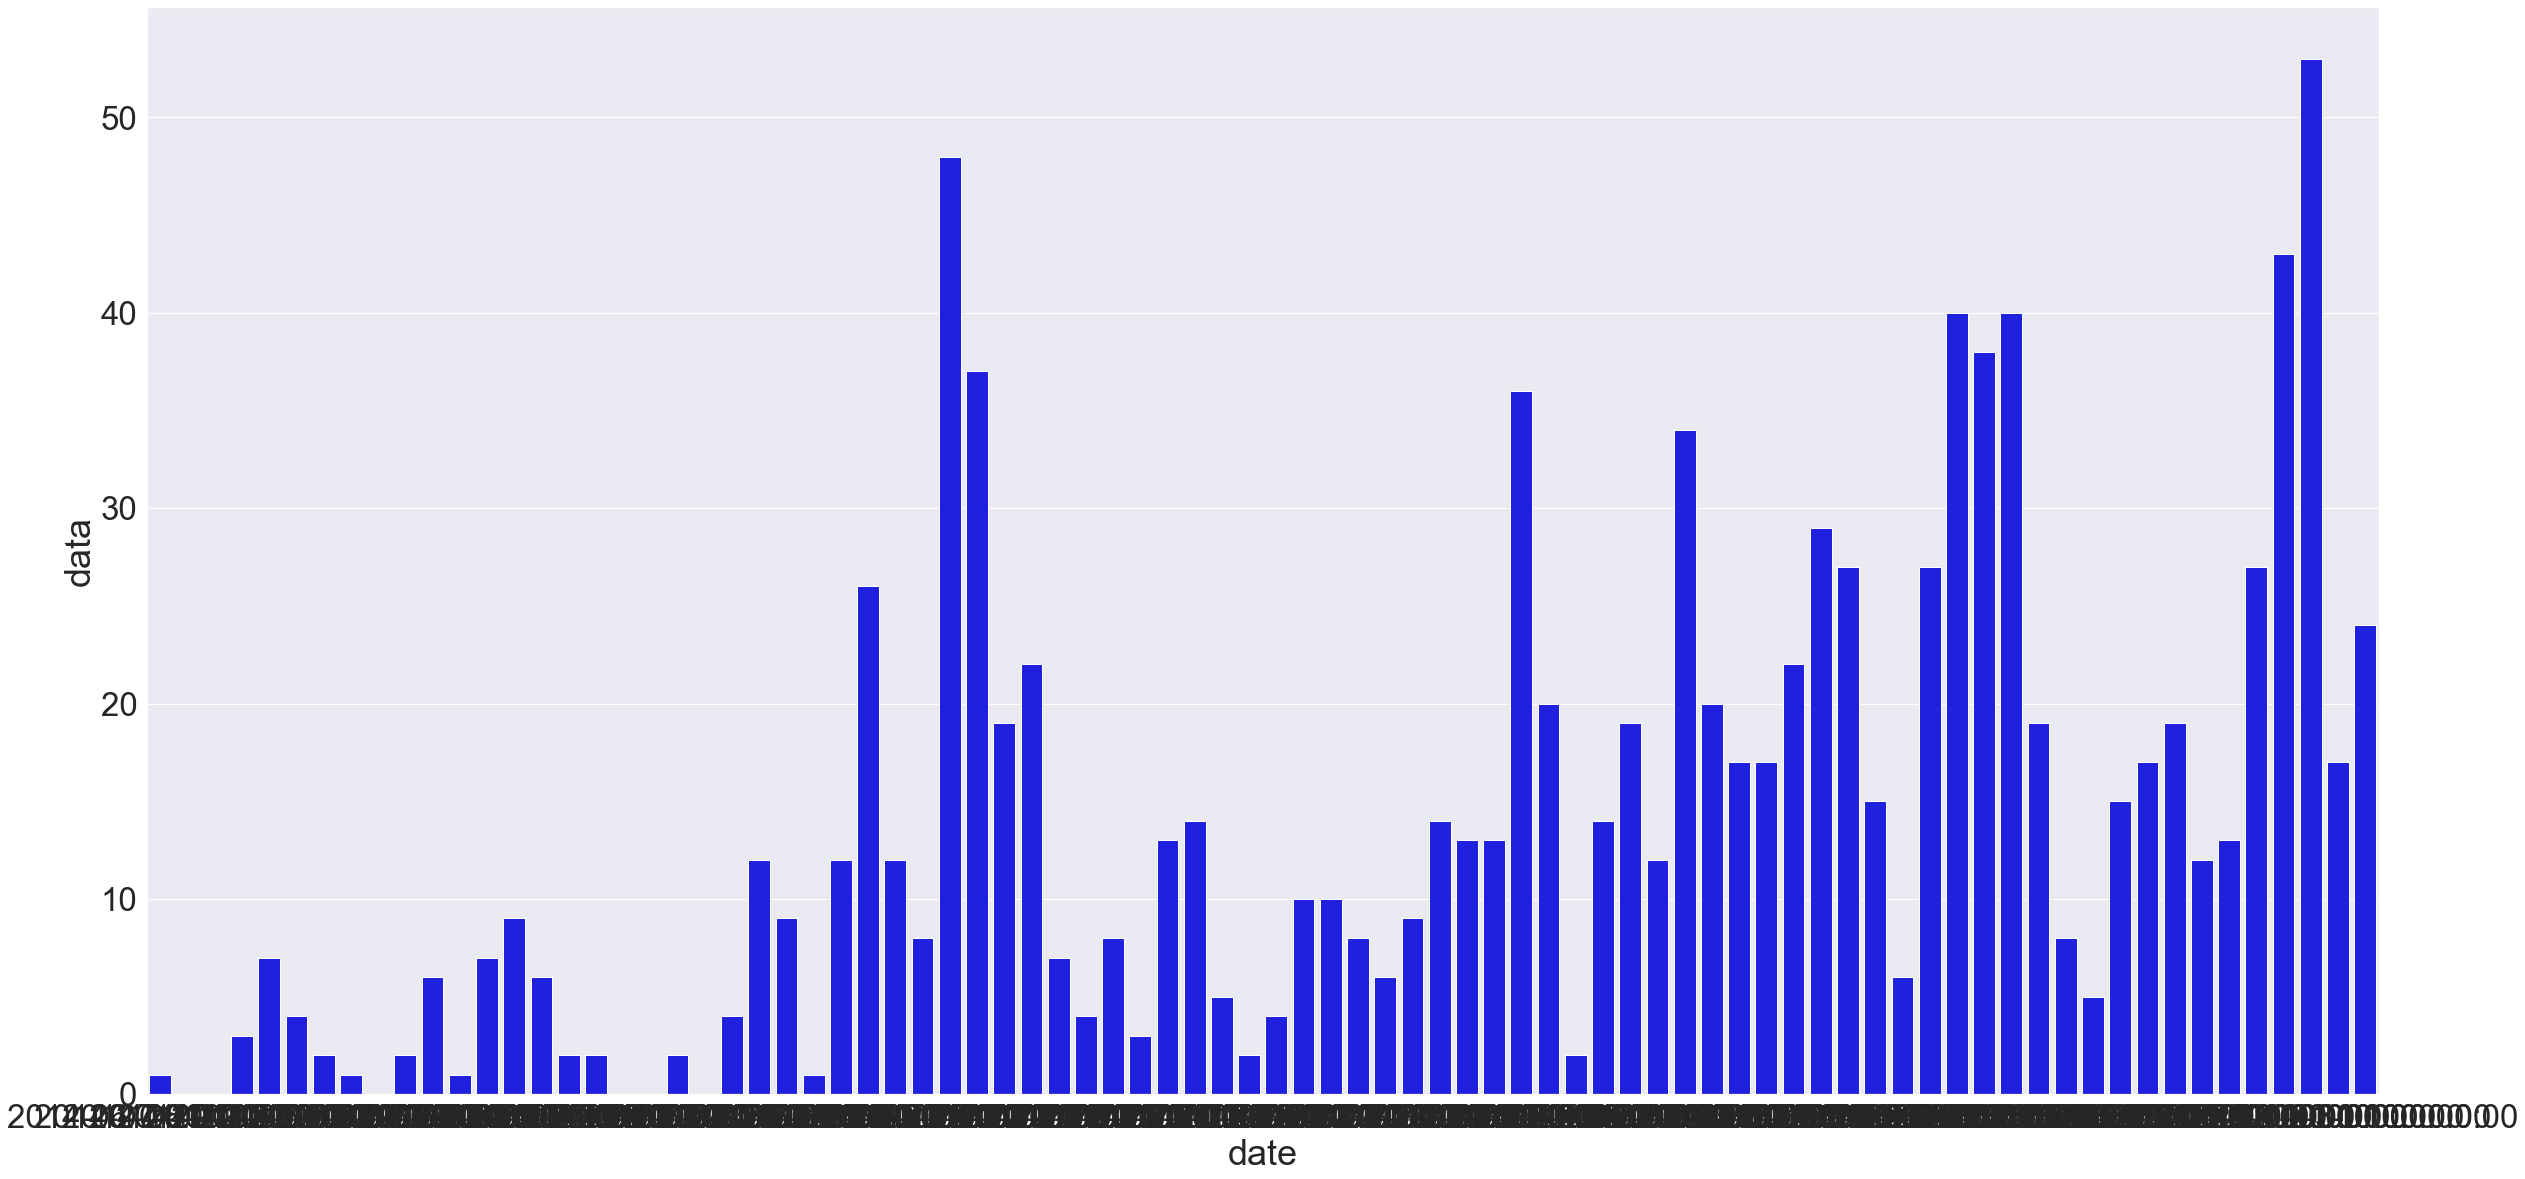

In [20]:
# set x labels
x_labels = post_counts.index
#create bar plot
sns.barplot(x_labels, post_counts, color="blue")

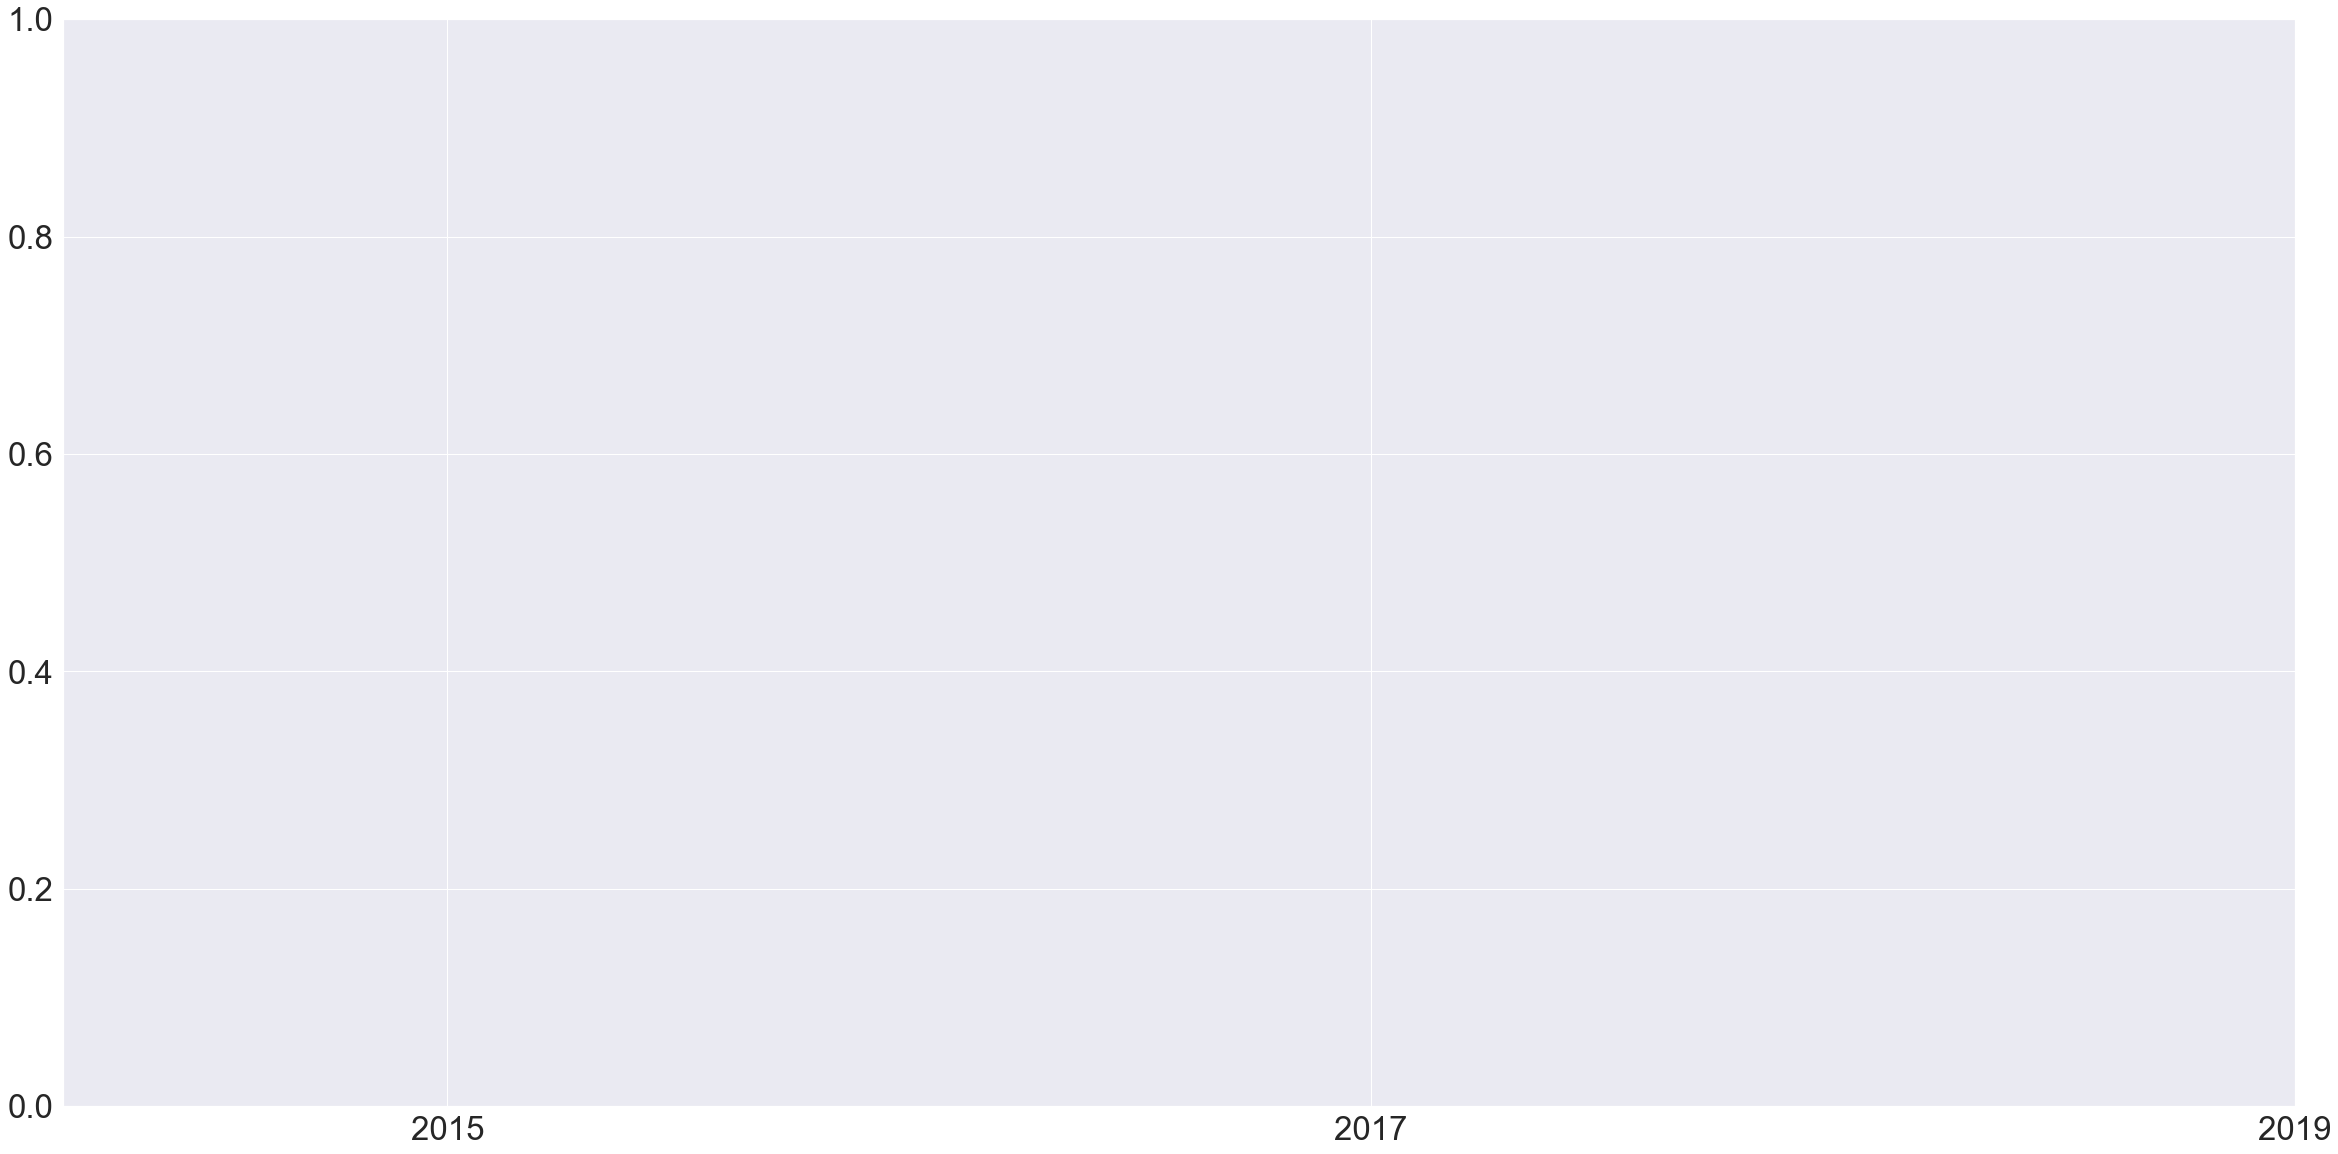

In [21]:
# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=24)
#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))
# display the plot
plt.show()